In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Pandasdata\\DT_files\\covid_19.csv")

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [4]:
# No variance in Country region and last_Update. so we will drop them. Also we can see that FIPS is normal numbers from 1 to 56, it will not have any significance.so dropping it
df.drop(['Country_Region','Last_Update','FIPS'],axis=1,inplace=True)

In [5]:
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,NaN,12530.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,-14.2710,-170.1320,0,0,NaN,0.0,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,33.7298,-111.4312,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [6]:
# As we know the province let us also drop Lat and Long
df.drop(['Lat','Long_'],axis=1,inplace=True)

In [7]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [8]:
# UID also doen't play an key role in predicting the output. so let us drop it.
df.drop('UID',axis=1,inplace=True)

In [9]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,NaN,12530.0,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,NaN,2.493766,USA,5063.940017,NaN
2,American Samoa,0,0,NaN,0.0,0.000000,124.0,NaN,NaN,ASM,222.857246,NaN
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584


In [10]:
df.describe()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,42.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,56.000000,33.000000
mean,26756.086207,1611.017241,7007.428571,20070.724138,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,52562.031122,4084.750891,11674.490020,41294.705318,402.682539,2.987834e+05,13185.628145,2.135002,1933.169297,5.047403
min,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,2596.000000,74.000000,970.000000,812.500000,148.521021,4.608100e+04,535.000000,3.072626,2712.800274,10.000000
50%,10148.500000,385.000000,3008.000000,5644.500000,250.477287,1.386545e+05,1493.000000,4.403318,3469.782532,13.598326
75%,29395.500000,1394.250000,7326.750000,19291.250000,477.888542,2.796948e+05,4389.000000,5.466238,4763.649736,17.658649
max,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


In [11]:
df.dtypes

Province_State           object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [12]:
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [13]:
df['Confirmed'].value_counts()

7551      1
154       1
18971     1
2866      1
49        1
944       1
2095      1
6317      1
8167      1
20262     1
1567      1
68126     1
3868      1
1819      1
14906     1
53009     1
21        1
787       1
401       1
22797     1
32908     1
5003      1
88970     1
11528     1
17670     1
15620     1
643       1
8194      1
7710      1
8507      1
29436     1
11967     1
13052     1
39801     1
150776    1
13356     1
35316     1
11122     1
47471     1
85997     1
18412     1
39017     1
5532      1
103       1
13413     1
478       1
7388      1
100418    1
29274     1
3801      1
9175      1
42323     1
4177      1
51673     1
2506      1
69        1
354370    1
0         1
Name: Confirmed, dtype: int64

In [14]:
df['Recovered'][2]=0
#as confirmed =0

In [15]:
df['Recovered'].isnull().sum()

15

In [16]:
df['Recovered']=df['Recovered'].fillna(df['Confirmed']-df['Active']-df['Deaths'])

In [17]:
df['Recovered'].isnull().sum()

0

In [18]:
df.isnull().sum()

Province_State           0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [19]:
df['Incident_Rate']=df['Incident_Rate'].fillna(df['Confirmed'])

In [20]:
df['People_Tested']=df['People_Tested'].fillna(df['Confirmed'])

In [21]:
df['People_Hospitalized']=df['People_Hospitalized'].fillna(0)

In [28]:
df['Mortality_Rate']=df['Mortality_Rate'].fillna((df['Deaths']*100)/(df['Confirmed']))

In [23]:
df['Testing_Rate']=df['Testing_Rate'].fillna(df['Testing_Rate'].mean())

In [24]:
df['Hospitalization_Rate']=df['Hospitalization_Rate'].fillna(0)

In [25]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,0.0,2.493766,USA,5063.940017,0.000000
2,American Samoa,0,0,0.0,0.0,0.000000,124.0,0.0,NaN,ASM,222.857246,0.000000
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,USA,3189.670370,10.693584


In [31]:
# as the deaths =0 mortaliaty rate should be zero
df['Mortality_Rate'][2]=0

In [32]:
df.isnull().sum()

Province_State          0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [33]:
df.dtypes

Province_State           object
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [34]:
df.drop('ISO3',axis=1,inplace=True)

In [35]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,0.0,12530.0,266.194321,164450.0,1493.0,3.999387,3353.942386,11.438860
1,Alaska,401,10,352.0,39.0,54.815493,37045.0,0.0,2.493766,5063.940017,0.000000
2,American Samoa,0,0,0.0,0.0,0.000000,124.0,0.0,0.000000,222.857246,0.000000
3,Arizona,14906,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
4,Arkansas,5003,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584


In [38]:
# can also drop Province State
df.drop('Province_State',axis=1,inplace=True)

In [39]:
from sklearn.preprocessing import StandardScaler


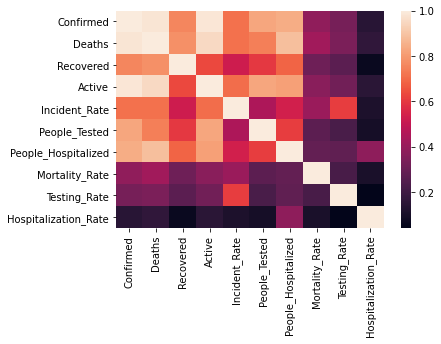

In [40]:
df_corr=df.corr()
sns.heatmap(df_corr)

In [41]:
# Hospitalization rate is very low correlated with O/P


In [42]:
x=df.drop('Deaths',axis=1)
y=df['Deaths']

In [43]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [46]:
x_train.shape

(40, 9)

In [47]:
x_test.shape

(18, 9)

In [51]:
y_train.shape

(40,)

In [48]:
from sklearn.metrics import r2_score,accuracy_score

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R2 Score=",r2_score(y_test,y_pred))

R2 Score= 1.0


In [52]:
# Let us finalize this 
import joblib
joblib.dump(lr,'Covid_19.pkl')

['Covid_19.pkl']